1.人口统计分析

country
United States           122
Germany                  59
China                    34
France                   24
Canada                   24
United Kingdom           21
Netherlands              18
Australia                15
Switzerland              14
Japan                    13
Italy                    10
Poland                   10
Spain                     7
New Zealand               7
Austria                   6
Czechia                   6
Sweden                    5
Denmark                   5
Hungary                   4
Singapore                 4
Belgium                   4
Finland                   4
Russia                    3
Brazil                    3
Bulgaria                  3
India                     3
Portugal                  2
Pakistan                  2
Norway                    2
Indonesia                 2
Hong Kong                 2
Taiwan                    2
Malaysia                  2
United Arab Emirates      2
Ecuador                   1
Ethiopia    

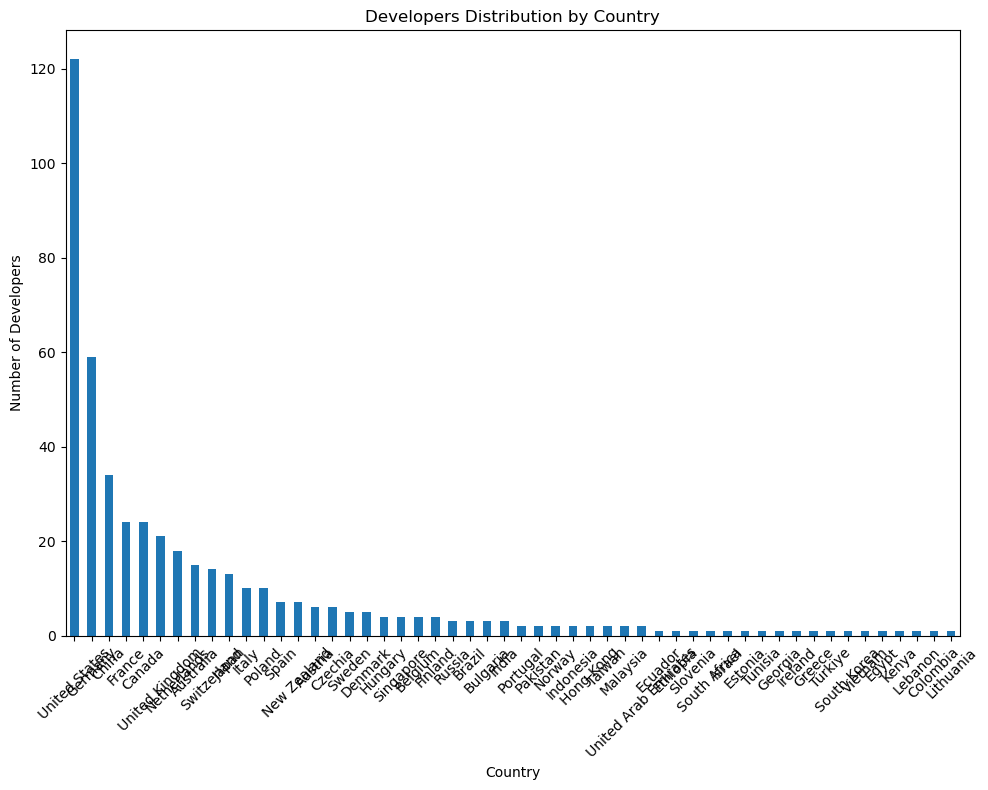

The main developer hub is United States with 122 developers.


In [1]:
# 统计用户所在国家和地区的分布，识别主要的开发者集中地
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的数据已经加载到Pandas DataFrame中
# 读取csv文件
df = pd.read_csv('users_combined_info_500.csv')

# 去重，确保每个用户只被计算一次
unique_users = df.drop_duplicates(subset='user_id')

# 统计每个国家的开发者数量
country_distribution = unique_users['country'].value_counts()

# 打印国家分布
print(country_distribution)

# 绘制每个国家的开发者数量的条形图
plt.figure(figsize=(10, 8))
country_distribution.plot(kind='bar')
plt.title('Developers Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 识别主要的开发者集中地
# 这里我们简单地将开发者数量最多的国家作为主要集中地
if not country_distribution.empty:
    main_hub = country_distribution.idxmax()
    main_hub_count = country_distribution.max()

    print(f"The main developer hub is {main_hub} with {main_hub_count} developers.")
else:
    print("No data available to determine the main developer hub.")

location
Germany                23
San Francisco           7
Berlin, Germany         7
Switzerland             6
Japan                   6
Paris, France           6
Tokyo, Japan            5
Berlin                  5
France                  5
San Francisco, CA       4
New Zealand             4
Singapore               4
Poland                  4
Beijing, China          4
Zurich, Switzerland     4
NYC                     3
Italy                   3
California              3
United States           3
Sweden                  3
Name: count, dtype: int64


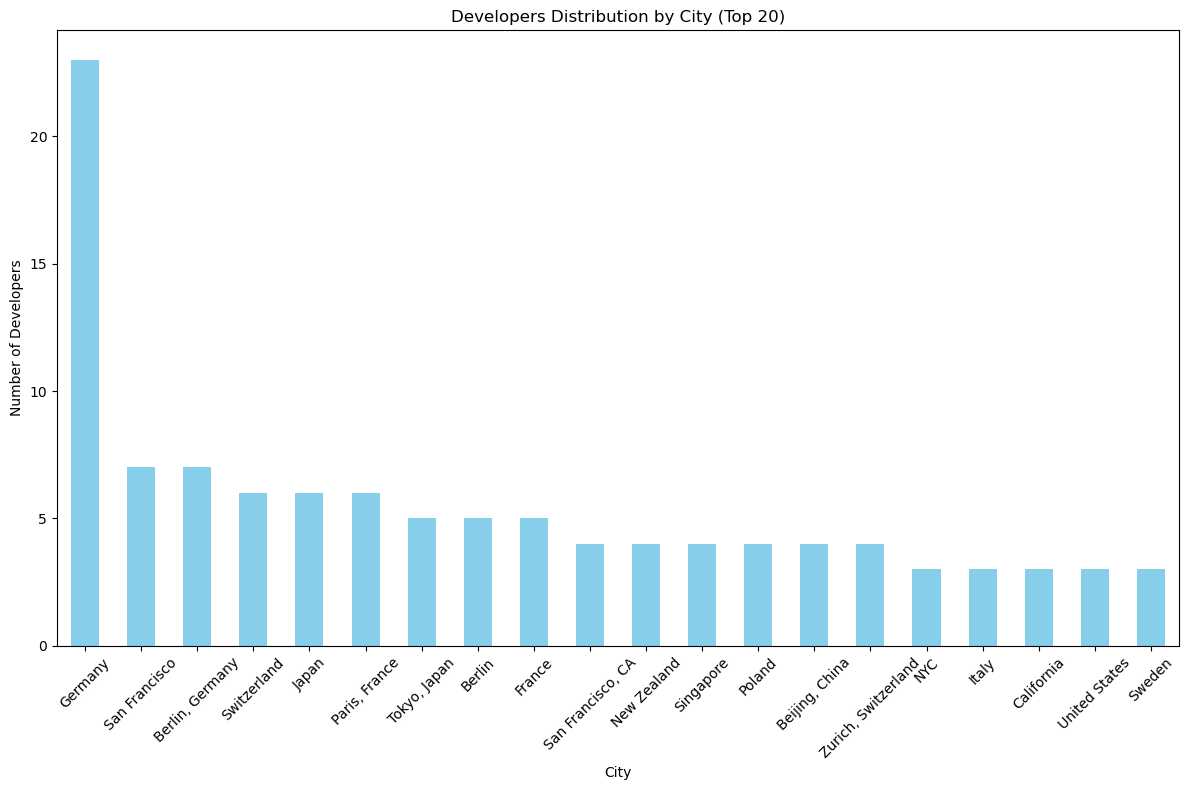

Top 10 Tech Hotspots by Developer Density:
location
Germany              23
San Francisco         7
Berlin, Germany       7
Switzerland           6
Japan                 6
Paris, France         6
Tokyo, Japan          5
Berlin                5
France                5
San Francisco, CA     4
Name: count, dtype: int64


In [2]:
# 城市级别分布：分析主要城市的开发者密度，发现技术热点区域
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的数据已经加载到Pandas DataFrame中
# 读取Excel文件
df = pd.read_csv('users_combined_info_500.csv')

# 去重，确保每个用户只被计算一次
unique_users = df.drop_duplicates(subset='user_id')

# 统计每个城市的开发者数量
city_distribution = unique_users['location'].value_counts()

# 只显示前二十个城市
top_20_cities = city_distribution.head(20)

# 打印城市分布
print(top_20_cities)

# 绘制每个城市的开发者数量的条形图
plt.figure(figsize=(12, 8))
top_20_cities.plot(kind='bar', color='skyblue')
plt.title('Developers Distribution by City (Top 20)')
plt.xlabel('City')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 识别技术热点区域
# 这里我们简单地将开发者数量最多的城市作为技术热点区域
if not city_distribution.empty:
    tech_hotspots = city_distribution.head(10)  # 获取开发者数量最多的前10个城市
    print("Top 10 Tech Hotspots by Developer Density:")
    print(tech_hotspots)
else:
    print("No data available to determine tech hotspots.")

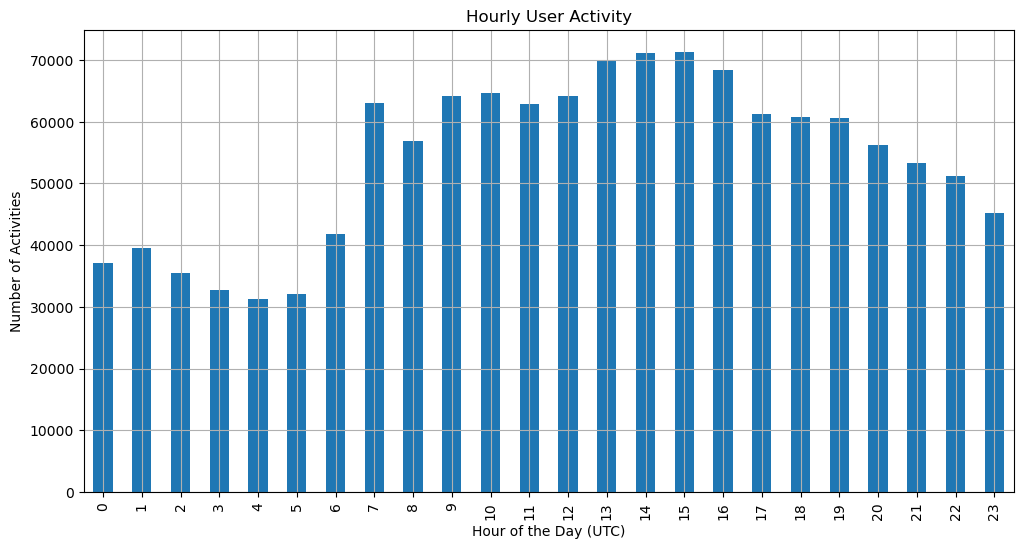

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 读取Excel文件
df = pd.read_csv('users_combined_info_500.csv')

# 确保event_time列是datetime类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取小时信息
df['hour'] = df['event_time'].dt.hour

# 统计每个小时内的活动数量
hourly_activity = df['hour'].value_counts().sort_index()

# 绘制每小时的活动数量的条形图
plt.figure(figsize=(12, 6))
hourly_activity.plot(kind='bar')
plt.title('Hourly User Activity')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Number of Activities')
plt.xticks(range(24))  # 设置x轴刻度为0-23小时
plt.grid(True)
plt.show()

2.协作行为分析

In [5]:
# 提交频率分析
import pandas as pd

# 读取Excel文件
df = pd.read_csv('users_combined_info_500.csv')

# 确保event_time列是datetime类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 筛选出表示提交事件的行，例如：CreateEvent, PullRequestEvent, IssuesEvent等
submit_events = df[df['event_type'].isin(['CreateEvent', 'PullRequestEvent', 'IssuesEvent'])]

# 统计每个用户的提交次数
user_submit_counts = submit_events['user_id'].value_counts().sort_values(ascending=False)

# 打印每个用户的提交次数
print(user_submit_counts)

# 识别高活跃用户和低活跃用户
# 这里我们简单地将提交次数最多的前10%用户视为高活跃用户，提交次数最少的后10%用户视为低活跃用户
cutoff_high = user_submit_counts.quantile(0.90)
cutoff_low = user_submit_counts.quantile(0.10)

high_active_users = user_submit_counts[user_submit_counts > cutoff_high]
low_active_users = user_submit_counts[user_submit_counts < cutoff_low]

print("\nHigh active users:")
print(high_active_users)

print("\nLow active users:")
print(low_active_users)

user_id
158862      15762
40306929    11252
28706372     7900
1580956      5850
46537034     5519
            ...  
8188402        72
3238291        63
6225961        60
814283         34
6702118        13
Name: count, Length: 497, dtype: int64

High active users:
user_id
158862       15762
40306929     11252
28706372      7900
1580956       5850
46537034      5519
43724913      4824
50149701      4089
9824526       4020
195327        3342
663432        3272
6270921       2775
20182680      2646
19890894      2424
2119212       2394
15247171      2053
116184        1985
12611259      1899
88161975      1789
4399574       1741
7237365       1741
20929282      1723
13323303      1682
282080        1669
19261257      1662
1309177       1600
48202465      1586
864788        1572
477956        1518
11516302      1513
1439341       1511
47313         1479
7258858       1430
27354907      1385
463230        1380
30715153      1346
1192433       1335
81981         1312
7083755       1293
10091

3.事件类型

Event Type Counts:
event_type
PushEvent                        410955
PullRequestEvent                 201128
IssueCommentEvent                174806
PullRequestReviewEvent           151843
CreateEvent                      104371
DeleteEvent                       96999
PullRequestReviewCommentEvent     86198
IssuesEvent                       51205
ReleaseEvent                       9455
WatchEvent                         3809
ForkEvent                          2175
CommitCommentEvent                  704
GollumEvent                         683
MemberEvent                         390
PublicEvent                          55
Name: count, dtype: int64


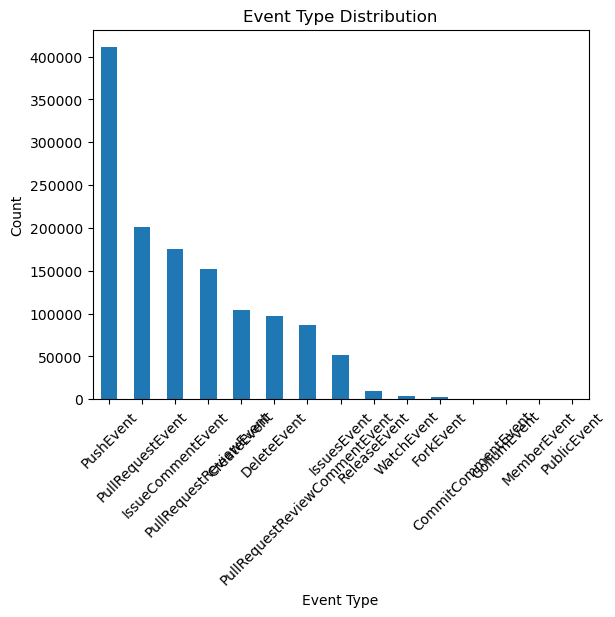

In [6]:
import pandas as pd

# 读取Excel文件
df = pd.read_csv('users_combined_info_500.csv')

# 确保event_type列存在
if 'event_type' in df.columns:
    # 统计不同类型事件的数量
    event_type_counts = df['event_type'].value_counts()

    # 打印事件类型统计结果
    print("Event Type Counts:")
    print(event_type_counts)

    # 可视化不同类型事件的数量
    event_type_counts.plot(kind='bar', title='Event Type Distribution')
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'event_type' column is not found in the data.")

4.单个用户分析

Event Type Counts for user_id 158862:
event_type
PushEvent            14460
PullRequestEvent     11799
DeleteEvent           7630
CreateEvent           3963
IssueCommentEvent      105
ReleaseEvent             2
WatchEvent               1
Name: count, dtype: int64


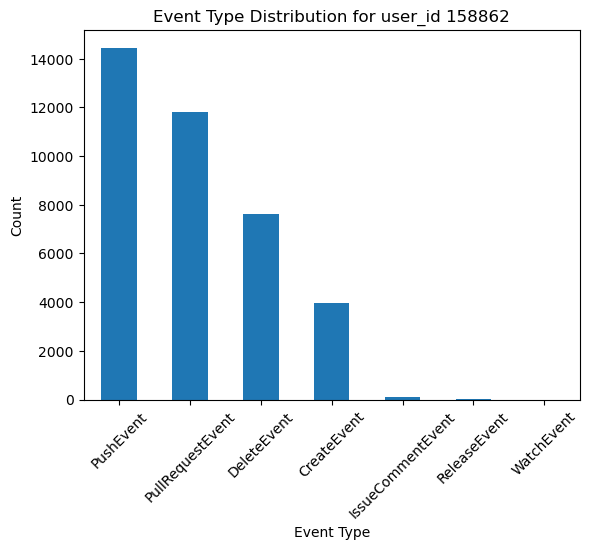

C:\Users\89172\AppData\Local\Temp\ipykernel_14976\3148985812.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['hour'] = user_data['event_time'].dt.hour


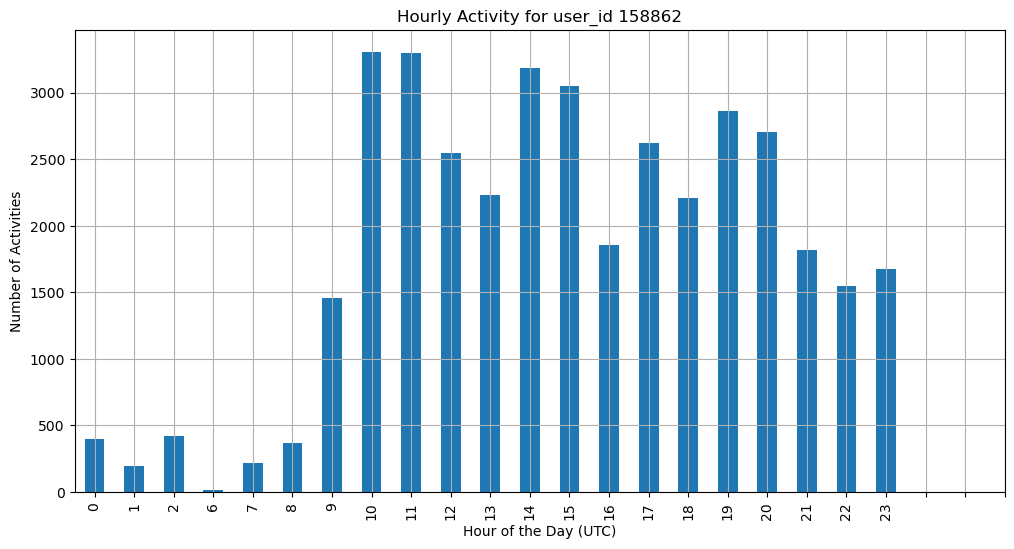

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_csv('users_combined_info_500.csv')

# 确保event_time列是datetime类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 筛选特定用户ID的数据，这里以user_id为158862为例
user_id = 158862
user_data = df[df['user_id'] == user_id]

# 如果用户数据不为空，进行分析
if not user_data.empty:
    # 统计不同类型事件的数量
    event_type_counts = user_data['event_type'].value_counts()

    # 打印事件类型统计结果
    print(f"Event Type Counts for user_id {user_id}:")
    print(event_type_counts)

    # 可视化不同类型事件的数量
    event_type_counts.plot(kind='bar', title=f'Event Type Distribution for user_id {user_id}')
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # 提取小时信息
    user_data['hour'] = user_data['event_time'].dt.hour

    # 统计每个小时内的活动数量
    hourly_activity = user_data['hour'].value_counts().sort_index()

    # 绘制每小时的活动数量的条形图
    plt.figure(figsize=(12, 6))
    hourly_activity.plot(kind='bar')
    plt.title(f'Hourly Activity for user_id {user_id}')
    plt.xlabel('Hour of the Day (UTC)')
    plt.ylabel('Number of Activities')
    plt.xticks(range(24))  # 设置x轴刻度为0-23小时
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for user_id {user_id}.")